In [118]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

In [119]:
api = wandb.Api()

In [120]:
sweep_ids = ("tw1f67ta",)
sweeps = [api.sweep(f"project-avengers/goon-test/sweeps/{sweep_id}") for sweep_id in sweep_ids]

In [121]:
results = []
last_step = 2048
for s in sweeps:
    runs = s.runs
    for r in runs:
        if r.state == "finished":
            config = deepcopy(r.config)
            losses =[x for x in r.scan_history(min_step=last_step, keys=["loss"])]
            assert len(losses) == 1
            config["loss"] = losses[0]["loss"]
            results.append(config)

In [122]:
results_df = pd.DataFrame(results)
results_df

,mup,d_model,n_layer,tracker,weights,col_name,datasets,head_dim,acc_steps,bos_token,...,num_steps,batch_size,seq_length,vocab_size,learning_rate,tokenizer_path,report_interval,mup_base_d_model,use_torch_compile,loss
0,True,4096,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.000464,/datasets/tokenizers/llama3,64,256,False,4.615421
1,False,4096,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.000100,/datasets/tokenizers/llama3,64,256,False,4.622015
2,True,4096,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.000100,/datasets/tokenizers/llama3,64,256,False,4.768283
3,False,4096,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.000464,/datasets/tokenizers/llama3,64,256,False,4.385578
4,False,4096,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.000215,/datasets/tokenizers/llama3,64,256,False,4.422498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,False,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.010000,/datasets/tokenizers/llama3,64,256,False,4.709414
66,True,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.002154,/datasets/tokenizers/llama3,64,256,False,4.586885
67,True,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.010000,/datasets/tokenizers/llama3,64,256,False,4.576536
68,True,256,4,wandb,1,contents,dataset=cc_en_head,128,16,None,...,2048,4,512,128256,0.004642,/datasets/tokenizers/llama3,64,256,False,4.539800


[None]

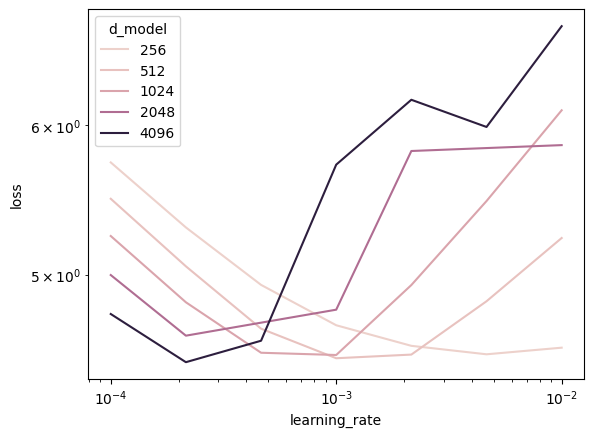

In [123]:
no_mup_plot = sns.lineplot(data=results_df[results_df.mup], x="learning_rate", y="loss", hue="d_model")
no_mup_plot.set(xscale="log")
no_mup_plot.set(yscale="log")

[None]

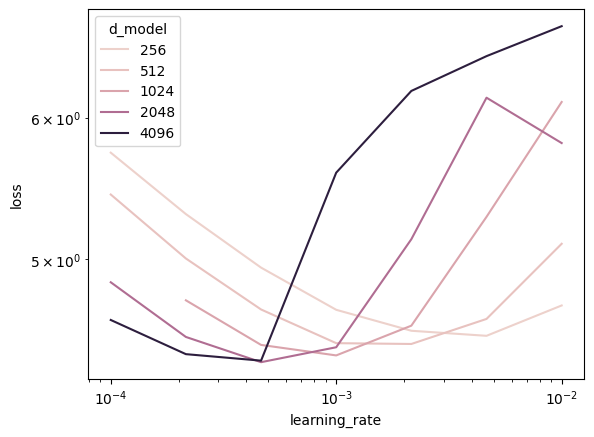

In [124]:
no_mup_plot = sns.lineplot(data=results_df[~results_df.mup], x="learning_rate", y="loss", hue="d_model")
no_mup_plot.set(xscale="log")
no_mup_plot.set(yscale="log")
